In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Bank Marketing Dataset

In [2]:
dataset = pd.read_csv("data/bank-full.csv", delimiter=';')

In [18]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


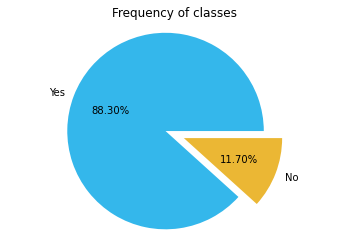

In [19]:
labels = 'Yes', 'No'
data = dataset['y'].value_counts().to_numpy()

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, explode=(0.1, 0.1), autopct='%1.2f%%', colors=['#34b7eb', '#ebb734'])
ax1.axis('equal') 
plt.title('Frequency of classes')
plt.savefig('figs/bank-y-pie.jpg')
plt.show()

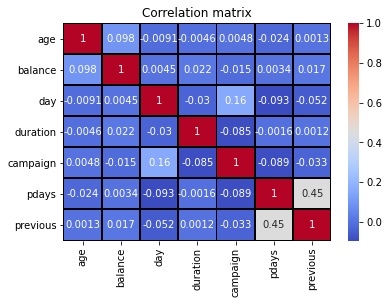

In [25]:
sns.heatmap(dataset.corr(), cmap= 'coolwarm', annot = True, linewidths=1, linecolor='black')
plt.title('Correlation matrix')
plt.savefig('figs/bank-corr-matrix.jpg')

In [28]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

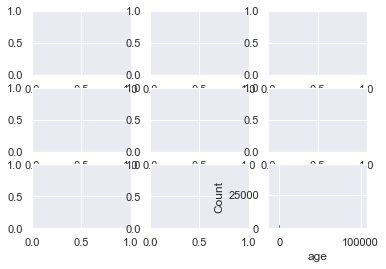

In [33]:
# sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 3)

sns.histplot(data=dataset, x="age")
sns.histplot(data=dataset, x="balance")
sns.histplot(data=dataset, x="day")
sns.histplot(data=dataset, x="duration")
sns.histplot(data=dataset, x="campaign")
sns.histplot(data=dataset, x="pdays")
sns.histplot(data=dataset, x="previous")

plt.show()

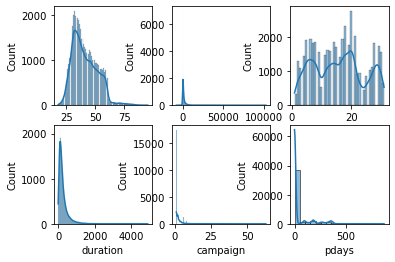

In [3]:
fig, axs = plt.subplots(2, 3)
sns.histplot(data=dataset, x="age", kde=True, ax=axs[0, 0])
sns.histplot(data=dataset, x="balance", kde=True, ax=axs[0, 1])
sns.histplot(data=dataset, x="day", kde=True, ax=axs[0, 2])
sns.histplot(data=dataset, x="duration", kde=True, ax=axs[1, 0])
sns.histplot(data=dataset, x="campaign", kde=True, ax=axs[1, 1])
sns.histplot(data=dataset, x="pdays", kde=True, ax=axs[1, 2])
plt.savefig('figs/bank-data-distribution.jpg')

## Employee Salaries Dataset

In [38]:
def toCsv(content): 
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@ATTRIBUTE" in line:
                attri = line.split()
                columnName = attri[attri.index("@ATTRIBUTE")+1]
                header = header + columnName + ","
            elif "@DATA" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            line = line.split(',')
            new_line = []
            for it in range(len(line)):
                item = list(line[it])
                if "'" == item[0]:
                    item[0] = '"'
                if "'" == item[-1]:
                    item[-1] = '"'
                new_line.append(''.join(item))
            newContent.append(','.join(new_line))
    return newContent

with open('data/employee_salaries' , "r") as inFile:
    content = inFile.readlines()
    name,ext = os.path.splitext(inFile.name)
    new = toCsv(content)
    with open("data/employee_salaries.csv", "w") as outFile:
        outFile.writelines(new)

In [42]:
employee_salaries_dataset = pd.read_csv("data/employee_salaries.csv", quotechar = '"')
employee_salaries_dataset = employee_salaries_dataset.replace(['?'],np.nan)

In [43]:
employee_salaries_dataset.head()

,full_name,gender,current_annual_salary,2016_gross_pay_received,2016_overtime_pay,department,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired
0,"Aarhus, Pam J.",F,69222.18,71225.98,416.1,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,NaN,09/22/1986,1986
1,"Aaron, David J.",M,97392.47,103088.48,3326.19,POL,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,NaN,09/12/1988,1988
2,"Aaron, Marsha M.",F,104717.28,107000.24,1353.32,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,NaN,11/19/1989,1989
3,"Ababio, Godfred A.",M,52734.57,57819.04,3423.07,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,NaN,05/05/2014,2014
4,"Ababu, Essayas",M,93396.00,95815.17,NaN,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,NaN,03/05/2007,2007


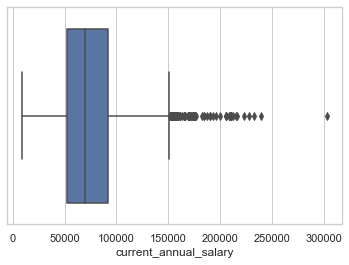

In [49]:
# sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=employee_salaries_dataset["current_annual_salary"])
plt.savefig('figs/employee-salaries-boxplot-current_annual_salary.jpg')

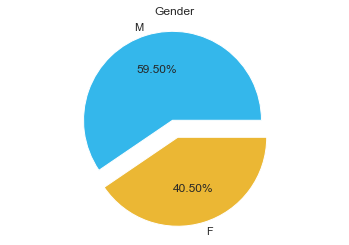

In [63]:
labels = 'M', 'F'
data = employee_salaries_dataset['gender'].value_counts().to_numpy()

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, explode=(0.1, 0.1), autopct='%1.2f%%', colors=['#34b7eb', '#ebb734'])
ax1.axis('equal') 
plt.title('Gender')
plt.savefig('figs/employee-salaries-gender-pie.jpg')
plt.show()

In [61]:
employee_salaries_dataset['gender'].value_counts() #.to_numpy()

M    5481
F    3730
Name: gender, dtype: int64

In [67]:
employee_salaries_dataset.head()

,full_name,gender,current_annual_salary,2016_gross_pay_received,2016_overtime_pay,department,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired
0,"Aarhus, Pam J.",F,69222.18,71225.98,416.1,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,NaN,09/22/1986,1986
1,"Aaron, David J.",M,97392.47,103088.48,3326.19,POL,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,NaN,09/12/1988,1988
2,"Aaron, Marsha M.",F,104717.28,107000.24,1353.32,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,NaN,11/19/1989,1989
3,"Ababio, Godfred A.",M,52734.57,57819.04,3423.07,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,NaN,05/05/2014,2014
4,"Ababu, Essayas",M,93396.00,95815.17,NaN,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,NaN,03/05/2007,2007


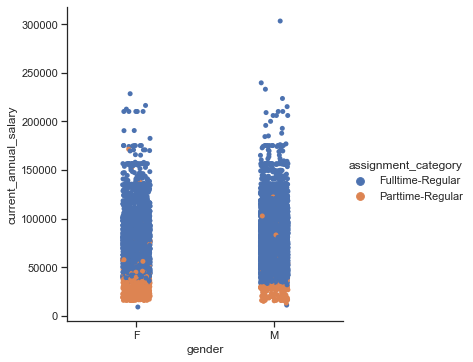

In [75]:
sns.catplot(x="gender", y="current_annual_salary", hue="assignment_category", data=employee_salaries_dataset)
plt.title('Gender and assignment category')
plt.savefig('figs/employee-salaries-gender-assignment-category-pie.jpg')